In [1]:
import os
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

The cellS below describe each dataset and loads it for easy visualization, and to get first impressions.

In [2]:
def first_impression_stats(df):

    print("Head:")
    display(df.head())

    print("Tail:")
    display(df.tail())

    print("Statistics:")
    display(df.describe())

    pass

# def first_impression_vis(df):

In [3]:
# csv file containing transects with bathymetric data for Barter island (measured in 2010-2011)
df_beach_profiles = pd.read_csv("raw_datasets/erikson/Beachprofiledat/BTI_20102011BeachProfiles_Data.csv")

# csv file containing near seabed conductivity, salinity, temperature, and depth measurements (measured in july - september 2011)
df_bed_meas = pd.read_csv("raw_datasets/erikson/Conductivity_te/BTI_2011TimeSeriesData_CTD.csv")

# csv file containing binned average horizontal and vertical flow velocities [m/s], as well as their amplicitudes (unit=counts[?]) (measured in july - september 2011)
df_vel = pd.read_csv("raw_datasets/erikson/Current_velocit/BTI_2011TimeSeriesData_CurrentVelocity.csv")

# csv file containing air temperature and ground temperatures at varying depths for different sites (measured in july - september 2011)
df_ground_temp = pd.read_csv("raw_datasets/erikson/Groundtemperatu/BTI_2011TimeSeriesData_GroundTemperature.csv")

# csv file containing wave and sea level statistics for identified storm dates with provided start start and end date, as well as duration (hindcasts and foreasts ranging 1981-2100)
df_storms = pd.read_csv("raw_datasets/erikson/Hindcast_1981_2/BTI_WavesAndStormSurges_1981-2100.csv")

# csv file containing mean sediment diameters and descriptions of sediment samples at different sites (measured in july 2011)
df_sediment = pd.read_csv("raw_datasets/erikson/Meangrainsizeof/BTI_2011GrainSize_Data.csv")

# csv file containing yearly projected first open water day, last open water day, and total open water days for different models (2011 - 2100)
df_open_water = pd.read_csv("raw_datasets/erikson/Projectedopenwa/BTI_OpenWaterSeasons_2011-2100.csv")

# csv file containing surface water temperature (every 20 minutes) of the sea for different sites (measured in july - september 2011)
df_sea_temp = pd.read_csv("raw_datasets/erikson/Sea_surfacewate/BTI_2011TimeSeriesData_SST.csv")

# Digital Elevation Model
# df = pd.read_csv("raw_datasets/erikson/Seamlesstopo_ba/...")

# csv file containing bathymetric data (i.e., depth relative to MSL and absolute water depth at time of measurement) obtained trough different systems (measured between 2010 and 2011)
df_bath = pd.read_csv("raw_datasets/erikson/Single_beambath/BTI_20102011Bathymetry_Data.csv")

# csv file containing conductivity and temperature data for different thermokarst lakes (measured in 2011)
df_thermokarst = pd.read_csv("raw_datasets/erikson/Thermokarstlake/BTI_2011ThermokarstTempSalinity_data.csv")

# csv file containing wave statistics (measured in july - september 2011)
df_waves = pd.read_csv("raw_datasets/erikson/Wavetime_series/BTI_2011TimeSeriesData_Waves.csv")

In [4]:
first_impression_stats(df_bath)

Head:


,UTC_Date,UTC_Time,Longitude,Latitude,Depth_MSL,TRUDEPTH_M,SYSTEM
0,08/25/2010,NaN,-143.553245,70.130925,NaN,1.75,Humminbird
1,08/25/2010,NaN,-143.553199,70.130897,NaN,1.85,Humminbird
2,08/25/2010,NaN,-143.553159,70.130868,NaN,1.85,Humminbird
3,08/25/2010,NaN,-143.553129,70.130838,NaN,2.05,Humminbird
4,08/25/2010,NaN,-143.553106,70.130806,NaN,2.15,Humminbird


Tail:


,UTC_Date,UTC_Time,Longitude,Latitude,Depth_MSL,TRUDEPTH_M,SYSTEM
70582,07/09/2011,02:10:10,-143.718673,70.104513,0.69,0.62,Sonarmite
70583,07/09/2011,02:10:11,-143.718668,70.104506,0.70,0.63,Sonarmite
70584,07/09/2011,02:10:11,-143.718669,70.104503,0.69,0.62,Sonarmite
70585,07/09/2011,02:10:12,-143.718668,70.104500,0.69,0.62,Sonarmite
70586,07/09/2011,02:10:13,-143.718668,70.104491,0.70,0.63,Sonarmite


Statistics:


,Longitude,Latitude,Depth_MSL,TRUDEPTH_M
count,70587.000000,70587.000000,59638.000000,70587.000000
mean,-143.793456,70.110379,2.610599,2.637753
std,0.124062,0.017248,1.828970,1.894298
min,-144.029625,70.076304,0.470000,0.380000
25%,-143.878698,70.097798,1.280000,1.260000
50%,-143.790802,70.107994,1.910000,1.950000
75%,-143.732878,70.122026,3.560000,3.490000
max,-143.484014,70.160122,11.100000,12.650000


In [20]:
df_bath.SYSTEM.unique()

array(['Humminbird', 'GarminSounder', 'Sonarmite'], dtype=object)

In [24]:
np.sum(df_bath.SYSTEM == 'Sonarmite')

20909

In [41]:
gdf = gpd.GeoDataFrame(df_bath, geometry=gpd.points_from_xy(df_bath.Longitude.values, df_bath.Latitude.values))

display(gdf.tail())

,UTC_Date,UTC_Time,Longitude,Latitude,Depth_MSL,TRUDEPTH_M,SYSTEM,geometry
70582,07/09/2011,02:10:10,-143.718673,70.104513,0.69,0.62,Sonarmite,POINT (-143.71867 70.10451)
70583,07/09/2011,02:10:11,-143.718668,70.104506,0.70,0.63,Sonarmite,POINT (-143.71867 70.10451)
70584,07/09/2011,02:10:11,-143.718669,70.104503,0.69,0.62,Sonarmite,POINT (-143.71867 70.10450)
70585,07/09/2011,02:10:12,-143.718668,70.104500,0.69,0.62,Sonarmite,POINT (-143.71867 70.10450)
70586,07/09/2011,02:10:13,-143.718668,70.104491,0.70,0.63,Sonarmite,POINT (-143.71867 70.10449)


<Axes: >

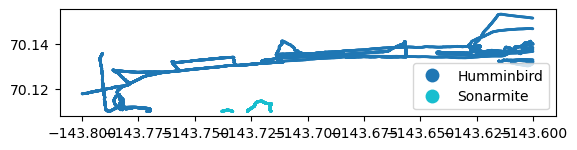

In [37]:
mask = (gdf["Longitude"] > -143.8) * (gdf["Longitude"] < -143.6) * (gdf["Latitude"] > 70.11) * (gdf["Longitude"] < 70.15)

gdf[mask].plot(column='SYSTEM', legend=True, alpha=1, markersize=1)

In [44]:
display(df_storms[df_storms.start_date_of_storm_year == 2011])

,start_date_of_storm_month,start_date_of_storm_day,start_date_of_storm_year,end_date_of_storm_month,end_date_of_storm_day,end_date_of_storm_year,Hso(m),Hs(m),Dp(deg),Tp(s),SS(m),Storm_duration(days),Hindcast_or_projection
62,9,25,2011,9,28,2011,3.6,3.2,265,8.3,0.55,3.9,projection
63,10,1,2011,10,4,2011,2.9,3.1,305,8.3,0.68,2.9,projection
64,10,2,2011,10,4,2011,2.9,3.2,285,8.3,0.68,2.1,projection


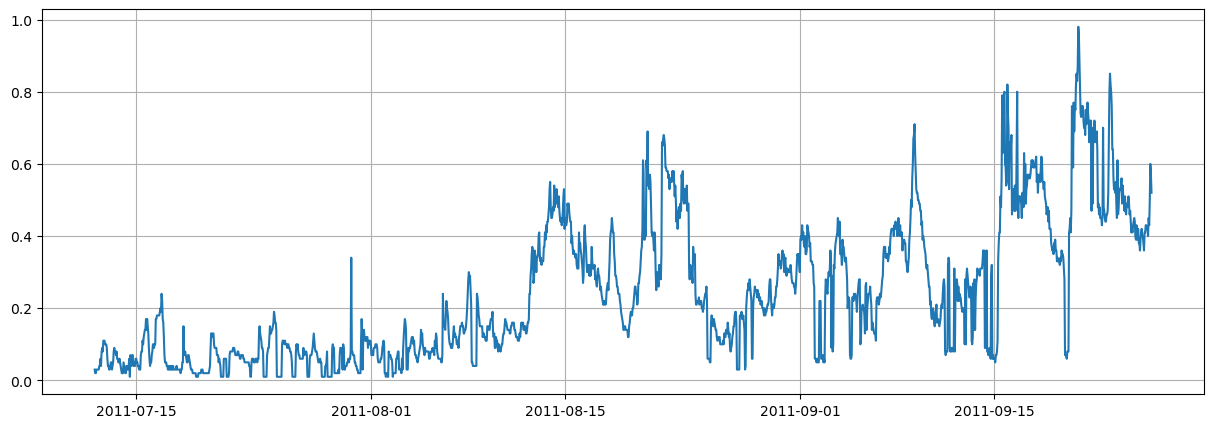

In [52]:
x = []

for year, month, day, hour in zip(df_waves.year.values, df_waves.month.values, df_waves.day,  df_waves.hour):

    x.append(datetime.datetime(year, month, day,  hour))
    
y = df_waves.Hs

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(x, y)

ax.grid()

In [5]:
first_impression_stats(df_ground_temp)

Head:


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2


Tail:


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
11770,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,11,47,-1.0,-0.5,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
11771,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,12,47,-0.5,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN
11772,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,13,47,-0.5,0.0,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN
11773,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,14,47,-0.5,1.5,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN
11774,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,15,47,-0.5,3.0,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN


Statistics:


,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
count,11775.000000,11775.000000,11775.0,11775.00000,11775.000000,11775.000000,11775.000000,7854.000000,1936.000000,1956.000000,5898.000000,5857.000000,3962.000000,3962.000000,3921.000000,3921.000000,3921.000000
mean,-143.791313,70.091350,2011.0,8.05189,16.512527,11.501911,15.202718,7.854367,6.073812,6.686605,6.626365,2.462523,5.601767,0.324533,-0.948508,-2.776358,-4.145575
std,0.060806,0.010714,0.0,0.78629,8.335417,6.911140,21.644735,6.089721,3.061803,4.009732,4.645810,2.444618,3.043243,0.725462,0.662566,0.850387,1.027083
min,-143.917740,70.084050,2011.0,7.00000,1.000000,0.000000,0.000000,-3.600000,-2.000000,-1.500000,-2.500000,-2.000000,-1.300000,-1.500000,-2.700000,-4.700000,-6.200000
25%,-143.779470,70.084111,2011.0,7.00000,10.000000,6.000000,0.000000,3.500000,4.000000,3.500000,3.500000,0.300000,3.100000,0.000000,-1.200000,-3.200000,-4.700000
50%,-143.779260,70.084150,2011.0,8.00000,17.000000,12.000000,0.000000,7.000000,6.000000,6.500000,6.000000,2.500000,5.800000,0.500000,-0.900000,-2.700000,-4.100000
75%,-143.779010,70.100720,2011.0,9.00000,24.000000,17.000000,45.000000,10.500000,8.000000,9.500000,8.700000,4.100000,7.800000,0.800000,-0.400000,-2.100000,-3.400000
max,-143.714840,70.111280,2011.0,9.00000,31.000000,23.000000,47.000000,39.500000,17.000000,22.000000,24.900000,16.000000,13.300000,8.900000,5.500000,5.200000,5.100000


In [18]:
df_ground_temp_clean = df_ground_temp.dropna(thresh=9+4)

first_impression_stats(df_ground_temp_clean)

Head:


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2


Tail:


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
11770,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,11,47,-1.0,-0.5,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN
11771,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,12,47,-0.5,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN
11772,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,13,47,-0.5,0.0,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN
11773,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,14,47,-0.5,1.5,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN
11774,BILS,EMS ibutton,-143.91774,70.11128,2011,9,28,15,47,-0.5,3.0,NaN,-0.5,-0.5,NaN,NaN,NaN,NaN,NaN


Statistics:


,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
count,9819.000000,9819.000000,9819.0,9819.000000,9819.000000,9819.000000,9819.000000,5898.000000,1936.000000,0.0,5898.000000,5857.000000,3962.000000,3962.000000,3921.000000,3921.000000,3921.000000
mean,-143.806547,70.089484,2011.0,8.050005,16.495468,11.502291,9.266931,8.112987,6.073812,NaN,6.626365,2.462523,5.601767,0.324533,-0.948508,-2.776358,-4.145575
std,0.055107,0.010802,0.0,0.786578,8.333841,6.912121,18.700411,6.471484,3.061803,NaN,4.645810,2.444618,3.043243,0.725462,0.662566,0.850387,1.027083
min,-143.917740,70.084050,2011.0,7.000000,1.000000,0.000000,0.000000,-3.600000,-2.000000,NaN,-2.500000,-2.000000,-1.300000,-1.500000,-2.700000,-4.700000,-6.200000
25%,-143.779470,70.084111,2011.0,7.000000,10.000000,6.000000,0.000000,3.500000,4.000000,NaN,3.500000,0.300000,3.100000,0.000000,-1.200000,-3.200000,-4.700000
50%,-143.779260,70.084150,2011.0,8.000000,17.000000,12.000000,0.000000,7.000000,6.000000,NaN,6.000000,2.500000,5.800000,0.500000,-0.900000,-2.700000,-4.100000
75%,-143.779210,70.084211,2011.0,9.000000,23.500000,17.000000,0.000000,10.800000,8.000000,NaN,8.700000,4.100000,7.800000,0.800000,-0.400000,-2.100000,-3.400000
max,-143.779010,70.111280,2011.0,9.000000,31.000000,23.000000,47.000000,39.500000,17.000000,NaN,24.900000,16.000000,13.300000,8.900000,5.500000,5.200000,5.100000


In [10]:
np.unique(df_ground_temp.month.values)
np.unique(df_ground_temp.year.values)

array([2011], dtype=int64)